## 1.1 Use LASSO regression to predict Salary from the other numeric predictors (you should omit the categorical predictors). 

### 1.1 Use LASSO regression to predict Salary from the other numeric predictors (you should omit the categorical predictors). 

### 1.1.1. Create a visualization of the coefficient trajectories


In [139]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

df_raw = pd.read_csv("Hitters.csv")
df_preclean = df_raw.drop(['Unnamed: 0', 'League', 'Division', 'NewLeague'], axis = 1)
df = df_preclean[~df_preclean['Salary'].isnull()]
print("Total rows: " + str(len(df)))
df.isnull().sum()

Total rows: 263


AtBat      0
Hits       0
HmRun      0
Runs       0
RBI        0
Walks      0
Years      0
CAtBat     0
CHits      0
CHmRun     0
CRuns      0
CRBI       0
CWalks     0
PutOuts    0
Assists    0
Errors     0
Salary     0
dtype: int64

In [140]:
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LassoLarsCV

target = df['Salary']

df_features=df.drop('Salary', axis = 1)
predictors_array = preprocessing.scale(df_features.astype('float64'))
predictors = pd.DataFrame(predictors_array, columns = list(df_features))
predictors.head()


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
0,-0.602900,-0.595675,-0.528551,-1.206112,-0.522063,-0.097527,1.397893,0.346791,0.174373,-0.002920,-0.121671,0.258966,0.435334,1.221499,-0.523191,0.213352
1,0.512542,0.492260,0.729966,0.441515,0.794060,1.609373,-0.901200,-0.452865,-0.409892,-0.076054,-0.415105,-0.199590,0.010373,2.109109,-0.253863,0.819964
2,0.628167,0.736490,0.958788,0.402286,1.026317,-0.189792,0.770868,1.301558,1.318174,1.898565,1.412051,1.572666,0.355654,-0.324661,-0.744179,-0.848219
3,-0.562092,-0.462459,-0.185319,-0.617673,-0.367225,-0.512719,-1.110209,-0.990935,-0.960153,-0.697693,-0.947521,-0.881228,-0.862315,1.840678,-0.543909,-0.696566
4,1.294712,1.358167,-0.871783,0.755349,-0.018840,-0.282057,0.770868,0.766993,0.634985,-0.612370,0.422846,0.017294,-0.251434,-0.031177,2.087225,2.488147


In [141]:
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, target, test_size=.2, random_state=123)
pred_test.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
30,-0.922570,-1.061933,-0.757373,-1.206112,-1.025286,-1.204705,-1.110209,-1.011091,-0.995703,-0.783016,-0.989873,-0.933900,-0.919230,0.541474,-0.412698,-0.393260
72,-0.147202,0.248029,0.157913,-0.029235,0.252127,-0.235924,0.979876,-0.229838,-0.198134,-0.344212,-0.224524,-0.112837,-0.126222,-0.829311,0.257171,0.061699
254,-0.113194,0.359043,-1.215015,0.480744,-0.947867,-0.235924,-0.065166,-0.386702,-0.334154,-0.770827,-0.269900,-0.636458,-0.251434,-0.374769,1.182557,1.274923
167,-1.323857,-1.195150,-0.986194,-1.166882,-1.451091,-1.343103,-1.319217,-1.072873,-1.032799,-0.807394,-1.017098,-0.980375,-0.941996,-0.675411,-0.778708,-0.848219
203,-1.072202,-0.706689,-0.757373,-0.774590,-0.483353,-1.296970,-0.274175,-0.764841,-0.754578,-0.697693,-0.784166,-0.726310,-0.683983,-0.882997,-0.820143,-1.151525


In [154]:
model = LassoLarsCV(cv=10, precompute=False).fit(predictors, target)

Text(0.5,1,'Regression Coefficients Progression for Lasso Paths')

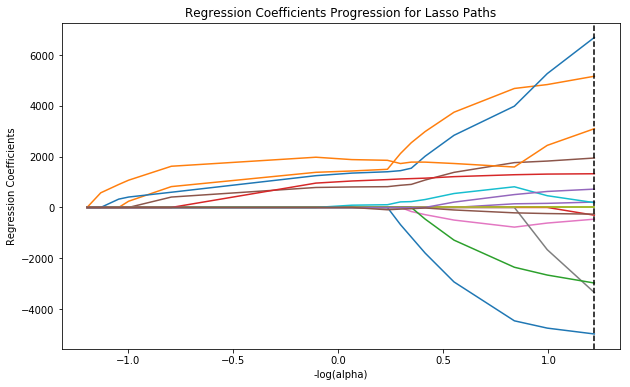

In [155]:
m_log_alphas = -np.log10(model.alphas_)
ax = plt.gca()
plt.plot(m_log_alphas, model.coef_path_.T)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k', label = 'alpha CV')
plt.ylabel('Regression Coefficients')
plt.xlabel('-log(alpha)')
plt.title('Regression Coefficients Progression for Lasso Paths')

### 1.1.2. Comment on which are the final three predictors that remain in the model

In [156]:
df_coeff = pd.DataFrame(dict(zip(predictors.columns, model.coef_path_))).T
df_coeff.columns = model.alphas_
df_coeff

,15.7413684232,13.5498041101,11.1283238449,9.98352429787,6.24734238564,1.27964209906,0.862644503599,0.58452699413,0.506364378777,0.449827294441,0.386475882337,0.28157584644,0.145254201842,0.101289938876,0.060440875139
Assists,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,210.064317,507.017781,629.629917,721.974870
AtBat,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-678.437739,-1169.032908,-1798.076993,-2934.969518,-4467.021634,-4754.572213,-4985.388193
CAtBat,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1664.497263,-3351.362621
CHits,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CHmRun,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,88.229362,107.047584,218.700697,230.034128,312.046310,548.749600,813.897881,462.210668,189.619840
CRBI,0.0,576.381414,903.696435,1073.537791,1622.693008,1978.405846,1884.648224,1856.928129,1729.859976,1786.243945,1785.739469,1731.073486,1592.635644,2445.550343,3101.539289
CRuns,0.0,0.000000,327.315021,409.443425,598.726936,1251.879139,1353.164607,1405.666811,1449.023036,1545.807326,2017.742406,2842.262193,3989.897614,5272.258588,6696.942856
CWalks,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-458.308933,-1288.076691,-2356.428975,-2663.853111,-2977.807646
Errors,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-91.745872,-64.413428,-49.892132,-21.124406,-99.706996,-212.689360,-240.886664,-263.766784
Hits,0.0,0.000000,0.000000,244.201611,820.767576,1383.966019,1436.568629,1502.296698,2125.673675,2550.416247,2989.583721,3751.895400,4687.494018,4841.193752,5169.134791


The last three features remain in the model are: Hits, CRuns, CRBI

### 1.1.3. Use cross-validation to find the optimal value of the regularization penalty

In [161]:
print("The optimal value of the regularization penalty is: " + str(round(model.alpha_, 3)))

The optimal value of the regularization penalty is: 0.06


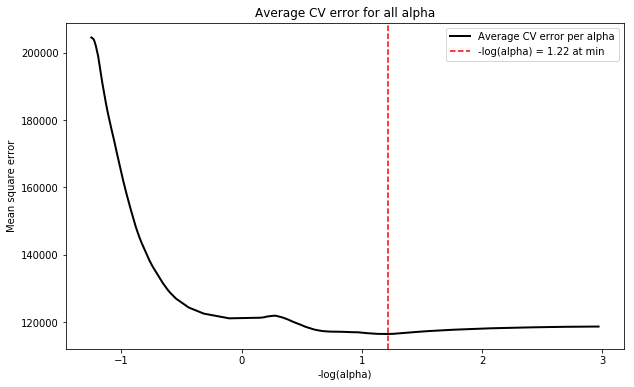

In [162]:
import matplotlib
m_log_alphas = -np.log10(model.cv_alphas_)
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
         label='Average CV error per alpha', linewidth=2)

plt.axvline(-np.log10(model.alpha_), linestyle='--', color='r',
            label='-log(alpha) = ' + str(round(-np.log10(model.alpha_),2)) + ' at min')
   
plt.xlabel('-log(alpha)')
plt.ylabel('Mean square error')
plt.title('Average CV error for all alpha')
plt.axis('tight')
plt.legend()

### 1.1.4. How many predictors are left in that model?

In [163]:
model.coef_

array([-307.41220539,  318.74250598,    0.        ,  -18.91352731,
         13.08494756,  120.08018952,  -28.51022548, -206.65387219,
          0.        ,   11.69246021,  412.95118714,  191.24910558,
       -183.61948563,   81.84948519,   44.51887763,  -16.26455668])

There are 14 predictors left in the model compare to the original 16. Although only one of the predictors were eliminated from the model, judging from the above plot displaying the average CV error for all alpha, we can see that we can obtain even smaller $-log(\alpha)$ (bigger $\alpha$, less predictors left in the final model) to maintain a similarlly small Average CV error. We can tune out more meaningless predictors at the cost of rising almost no CV error amd maintaining the same model accuracy. 

Reference: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoLarsCV.html

### 1.2 Repeat with Ridge Regression. 
### 1.2.1 Visualize the coefficient trajectories

(0.03437728780738071,
 2.0446331207346833,
 -76.322000000000003,
 103.02200000000001)

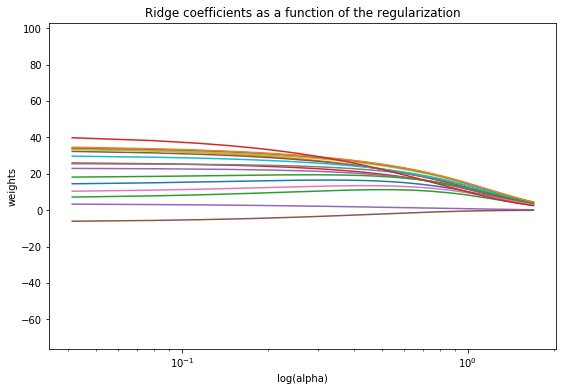

In [166]:
#new 
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
import warnings

coefs = []
cv_score = []
alphas = np.arange(0,50, 0.1)

# Train the model with different regularization strengths
for a in alphas:
    
    warnings.filterwarnings("ignore")
    model_r = Ridge(a, normalize = True)
    model_r.fit(predictors, target)
    coefs.append(np.round(model_r.coef_, 2))
    cv_score.append(cross_val_score(model_r, predictors, target, cv=10).mean())

# Display results
plt.figure(figsize=(20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(np.log10(alphas), coefs)
ax.set_xscale('log')
plt.xlabel('log(alpha)')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')


### 1.2.2 Use cross-validation to find the optimal value of the regularization penalty

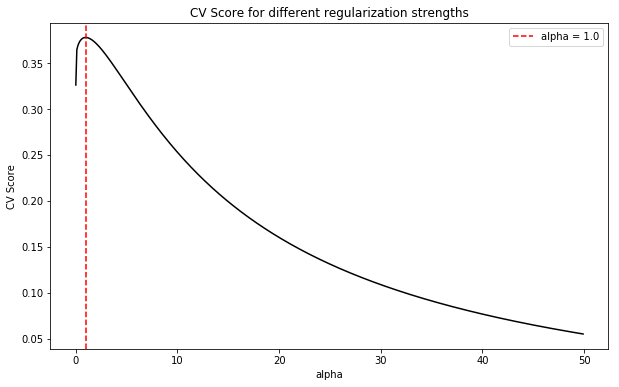

In [168]:
plt.plot(alphas, cv_score, color='k')  
plt.axvline(alphas[cv_score.index(max(cv_score))], linestyle='--', color='r', 
            label='alpha = ' + str(round(alphas[cv_score.index(max(cv_score))], 2)))
plt.xlabel('alpha')
plt.ylabel('CV Score')
plt.title('CV Score for different regularization strengths')
plt.legend()

In [138]:
print("The optimal value of the regularization penalty is " + str(round(alphas[cv_score.index(max(cv_score))], 2))) 

The optimal value of the regularization penalty is 1.0


### 2.1 Explain in your own words the bias-variance tradeoff

The bias-variance tradeoff refers to when you fit a model, the model that is more variable (the shape is more shaply), tend to have lower bias, and vica versa. The more the model tries to memories all the training data, the more it variate/ocilate when trying to stay close to as many data point as possible. This will make the training error small, hense small bias. In its opposite case, the more generalized the model gets, the less variate it is. This will make the training error large as it will not try to stay close to many training data point, hense the high bias. 

### 2.2 What role does regularization play in this tradeoff? 

The regularization makes sure that the coefficient stay at a reasonable magnitude. Hence the variance is being controlled at a low level, or even shinked to 0 if we use Lasso. This will make the bias slightly higher but will prevent overfitting of the training data. 

### 2.3 Make reference to your findings in number (1) to describe models of high/low bias and variance

Acccording to the two coefficient trajectories, the larger the regularization parameter get, the smaller the coefficient get for both of the model. The LASSO regressoin uses L1 norm for the coefficient as the penalty term. As the regularization parameter $\alpha$ increases, the more and more coefficients turned to 0. LASSO is great for feature selection because of this. Ridge regression uses L2 norm as its penalty term so all of the coefficient will get smaller as $\alpha$ increases but all of them will remain non-zero. 

Both LASSO and RIDGE uses penalty term times regularization parameter to achieve lowing variance to achieve low variance and eliminate overfitting. In both cases, when $\alpha$ is small, the model performs similarlly to simple linear regression. When the regularization stength is small, the model tend to overfit. This reflect on both of the cv error plot, when the model overfit and loses generalization, the CV error is high(CV score is low). As we increase the regularization stength, the model overfit less and hence the CV error has gone down(CV score increases). The model reachs to its optimal $\alpha$ at the valley of the CV error(peak of CV score). As we keep increasing $\alpha$, the model gets too generalized that it actually lost information and was underfitted so the CV error increases(CV score decreases).  

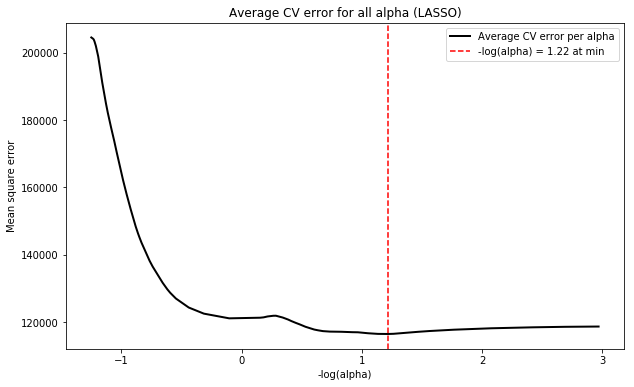

In [172]:
import matplotlib
m_log_alphas = -np.log10(model.cv_alphas_)
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
         label='Average CV error per alpha', linewidth=2)

plt.axvline(-np.log10(model.alpha_), linestyle='--', color='r',
            label='-log(alpha) = ' + str(round(-np.log10(model.alpha_),2)) + ' at min')
   
plt.xlabel('-log(alpha)')
plt.ylabel('Mean square error')
plt.title('Average CV error for all alpha (LASSO)')
plt.axis('tight')
plt.legend()

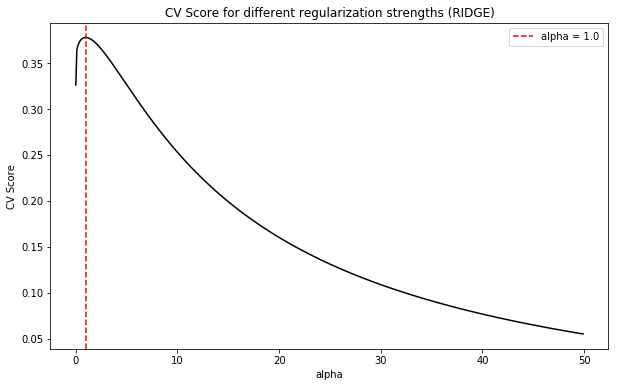

In [173]:
import matplotlib
plt.plot(alphas, cv_score, color='k')  
plt.axvline(alphas[cv_score.index(max(cv_score))], linestyle='--', color='r', 
            label='alpha = ' + str(round(alphas[cv_score.index(max(cv_score))], 2)))
plt.xlabel('alpha')
plt.ylabel('CV Score')
plt.title('CV Score for different regularization strengths (RIDGE)')
plt.legend()